In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets, tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [12]:
tennis = pd.read_csv('../../DataScience/data/tennis.csv')
tennis

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [13]:
X = tennis.iloc[:,:-1]
Y = tennis.iloc[:,-1]

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.3, random_state=14)

In [15]:
le = LabelEncoder()
play_encoded = le.fit_transform(tennis['play'])
le.classes_

array(['no', 'yes'], dtype=object)

In [16]:
ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(X_train).toarray()

In [17]:
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train.columns))
ohe_df

,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal,windy_False,windy_True
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [50]:
dtree1.tree_.max_depth

2

In [18]:
dtree1 = DecisionTreeClassifier(criterion='gini', splitter='random', random_state=140)

model1 = dtree1.fit(X_train_ohe, Y_train)

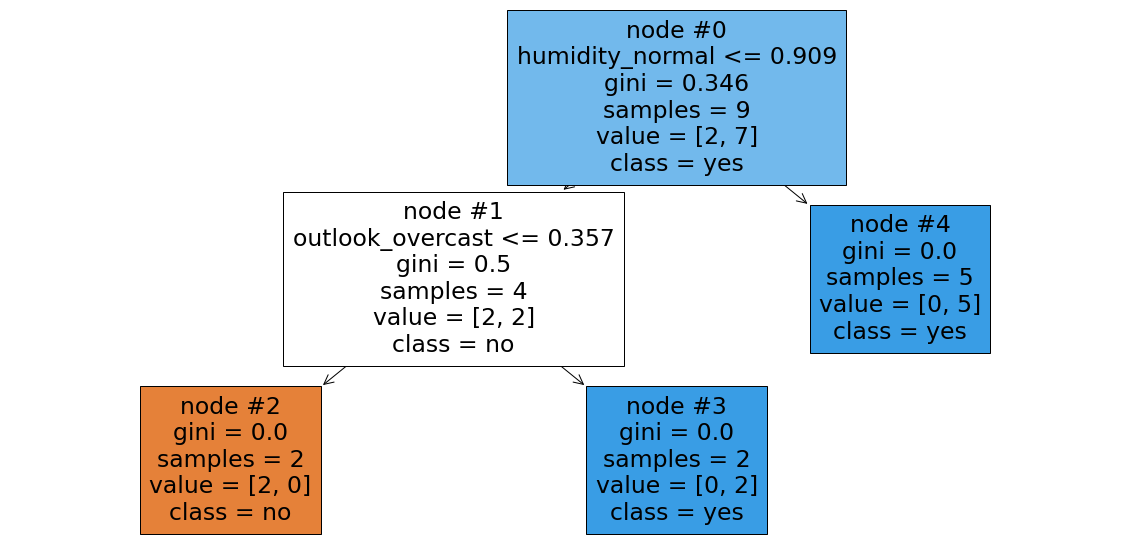

In [19]:
fig, ax = plt.subplots(figsize=(20,10))

ax = tree.plot_tree(model1, feature_names=ohe_df.columns, class_names=le.classes_, filled=True, node_ids=True, )

In [20]:
model1.feature_importances_

array([0.64285714, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.35714286, 0.        , 0.        ])

<BarContainer object of 10 artists>

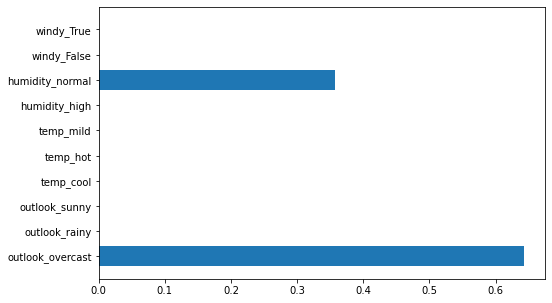

In [21]:
fig, ax = plt.subplots(figsize=(8,5))
ax.barh(ohe_df.columns, dtree1.feature_importances_)

In [22]:
X_test_ohe = ohe.fit_transform(X_test)
model1_y_pred = model1.predict(X_test_ohe)

In [23]:
print('Accuracy: ', accuracy_score(Y_test, model1_y_pred))

Accuracy:  0.6


## Model 2

In [24]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [25]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(iris.species)
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [26]:
x = iris.iloc[:,:-1]
y = iris.species

In [27]:
dtree2 = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=1234)

In [28]:
model2 = dtree2.fit(x,y)

In [29]:
text_representation = tree.export_text(model2)

with open('decision_tree.log', mode='w+') as logfile:
    logfile.write(text_representation)

print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: virginica



In [30]:
x.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [33]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

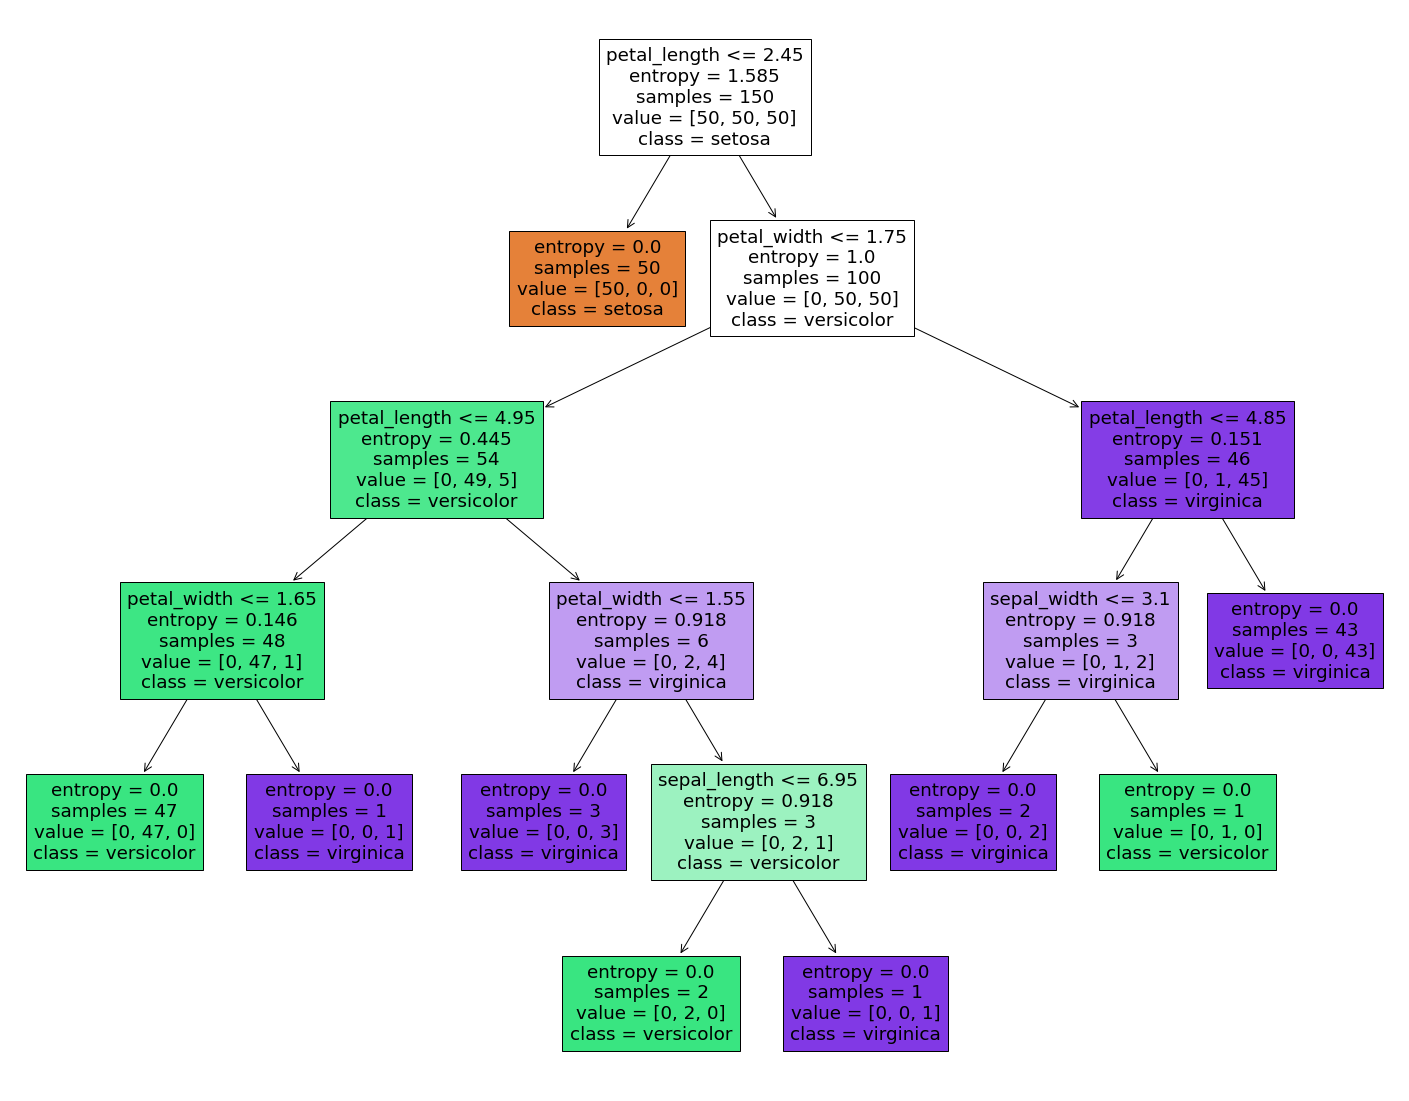

In [35]:
fig, ax = plt.subplots(figsize=(25,20))
ax = tree.plot_tree(model2, feature_names=x.columns, class_names=encoder.classes_, filled=True)

In [22]:
dtree2.feature_importances_

array([0.0115876 , 0.0115876 , 0.64544598, 0.33137881])

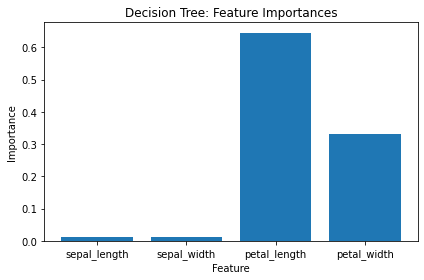

In [23]:
fig, ax = plt.subplots()

ax.bar(x.columns, dtree2.feature_importances_)
ax.set(title = 'Decision Tree: Feature Importances',
       xlabel = 'Feature',
       ylabel = 'Importance')
fig.tight_layout()

In [24]:
model2_y_pred = model2.predict(x)

In [25]:
print('Accuracy: ', accuracy_score(y, model2_y_pred))

Accuracy:  1.0


## Hyperparameter Tuning

In [28]:
classifier = DecisionTreeClassifier(random_state=33)

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 3, 5, None],
    'max_features': ['sqrt', 'log2', None]
}

In [29]:
tree_grid = GridSearchCV(estimator=classifier, param_grid=params)

In [30]:
tree_grid.fit(x, y_encoded)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=33),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, None],
                         'max_features': ['sqrt', 'log2', None]})

In [31]:
new_tree = tree_grid.best_estimator_

new_tree.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
tree_grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_features': None}

In [33]:
tree_grid.best_score_

0.9600000000000002

In [ ]:
path = dt_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs=[]
for ccp_alpha in ccp_alphas[ccp_alphas >=0]:
    tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    tree.fit(x_train ,y_train)
    clfs.append(tree)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
    clfs[-1].tree_.node_count, ccp_alphas[-1]))

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

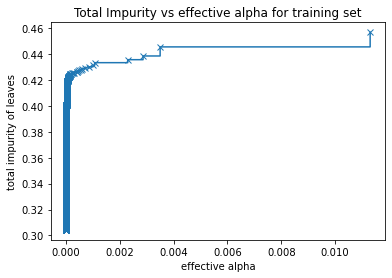

In [229]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='x', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [67]:
from sklearn.utils.class_weight import compute_class_weight

class_weight_dct = dict(
    zip(
        np.unique(y),
        compute_class_weight(class_weight='balanced', classes=np.unique(y), y=np.ravel(np.array(y)))
    )
)

In [188]:
path = cls_tree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs=[]

for ccp_alpha in ccp_alphas[ccp_alphas >=0]:
    tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    tree.fit(x_train ,y_train)
    clfs.append(tree)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
    clfs[-1].tree_.node_count, ccp_alphas[-1]))